**Create a Plot of Total Deaths, Confirmed, Recovered, and Active Cases Country-Wise where Deaths are Greater Than 150**

Problem Statement:
Write a Python program that plots the total deaths, confirmed cases, recovered cases, and active cases for each country where the total deaths are greater than 150. The plot should be a line plot, where each line represents one of the categories (deaths, confirmed, recovered, and active cases) for each country. The data should be sourced from a suitable API or dataset.


In [1]:
!pip install pandas
!pip install matplotlib

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 1.4 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/11.1 MB 1.6 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/11.1 MB 1.7 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.1 MB 1.4 MB/s eta 0:00:07
   ------ --------------------------------- 1.8/11.1 MB 1.3 MB/s eta 0:00:08
   ------ --------------------------------- 1.8/11.1 MB 1.3 MB/s eta 0:00:08
   ------ --------------------------------- 1.8/11.1 MB 1.3 MB/s eta 0:00:08
   ------- -------------------------------- 2.1/11.1 MB 991.7 kB/s eta 0:00:10
   ------- -------------------------------- 2.1/11.1 MB 991.7 kB/s eta 0:00:10
   -------- ------------------------------- 2.4/11.1 MB 967.3 kB/s eta 0:00:10
   --------- -

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
covid_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-19-2020.csv', usecols=['Last Update', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered'])

In [4]:
covid_data

,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,China,2020-03-19T10:13:14,67800,3130,57682
1,Italy,2020-03-19T17:43:03,41035,3405,4440
2,Iran,2020-03-19T11:33:29,18407,1284,5710
3,Spain,2020-03-19T20:13:08,17963,830,1107
4,Germany,2020-03-19T20:13:08,15320,44,113
...,...,...,...,...,...
323,United Kingdom,2020-03-19T10:13:14,0,11,0
324,Nauru,2020-03-19T10:13:14,0,0,0
325,New Zealand,2020-03-19T10:13:14,0,0,0
326,Tuvalu,2020-03-19T10:13:14,0,0,0


In [5]:
covid_data['Active'] = covid_data['Confirmed'] - covid_data['Deaths'] - covid_data['Recovered']

In [6]:
r_data = (
    covid_data.groupby("Country/Region")[["Deaths", "Confirmed", "Recovered", "Active"]]
    .sum()
    .reset_index()
)

In [7]:
r_data = r_data.sort_values(by='Deaths', ascending=False)

In [8]:
r_data = r_data[r_data['Deaths'] > 50]

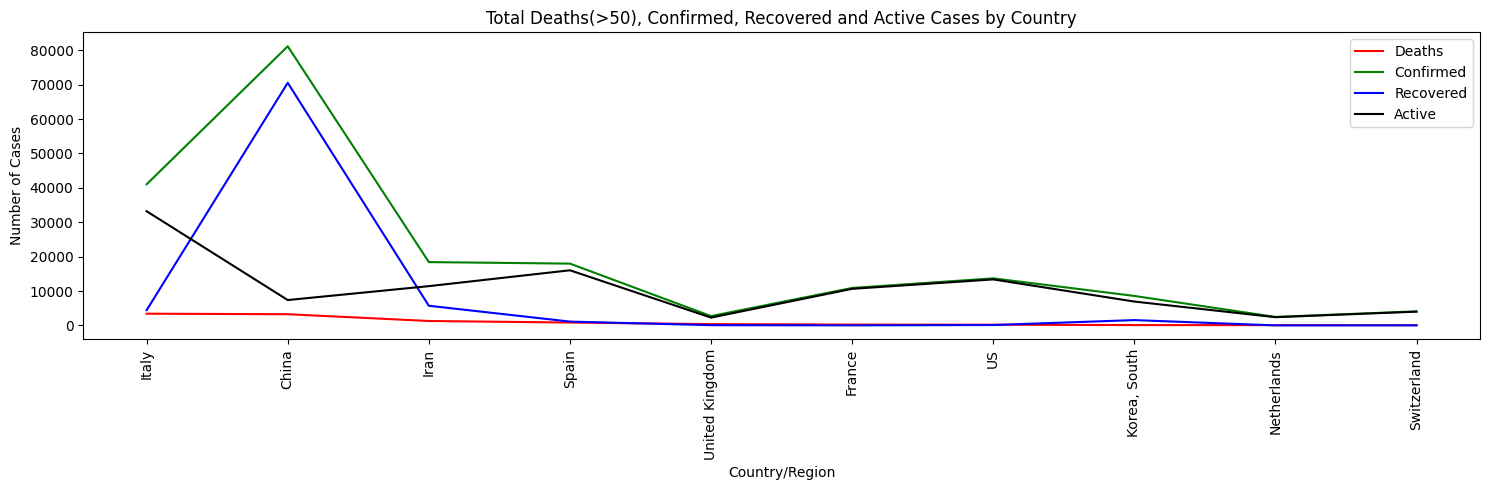

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(r_data['Country/Region'], r_data['Deaths'], color='red', label='Deaths')
plt.plot(r_data['Country/Region'], r_data['Confirmed'], color='green', label='Confirmed')
plt.plot(r_data['Country/Region'], r_data['Recovered'], color='blue', label='Recovered')
plt.plot(r_data['Country/Region'], r_data['Active'], color='black', label='Active')

plt.title('Total Deaths(>50), Confirmed, Recovered and Active Cases by Country')
plt.xlabel('Country/Region')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()